In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Prepare a color palette, useful later
sns.set_theme(palette='viridis', style='white')
palette = []
for color in mcolors.TABLEAU_COLORS.values():
      palette.append(color)

def moving_average(series, w):
    retv = np.cumsum(series)
    retv[w:] = retv[w:] - retv[:-w]
    return retv[w - 1:] / w

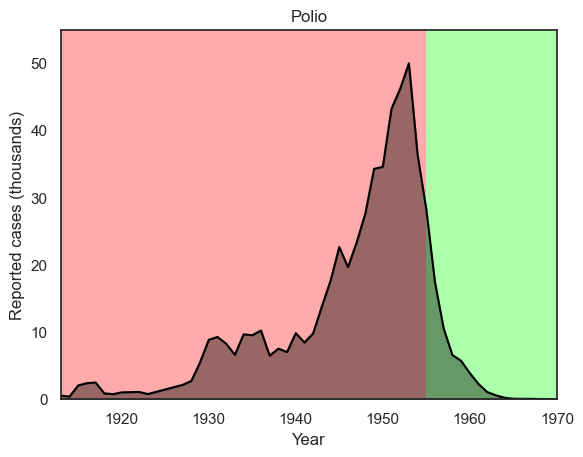

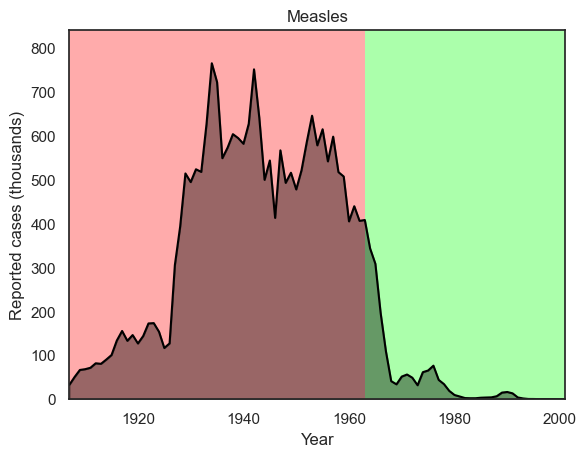

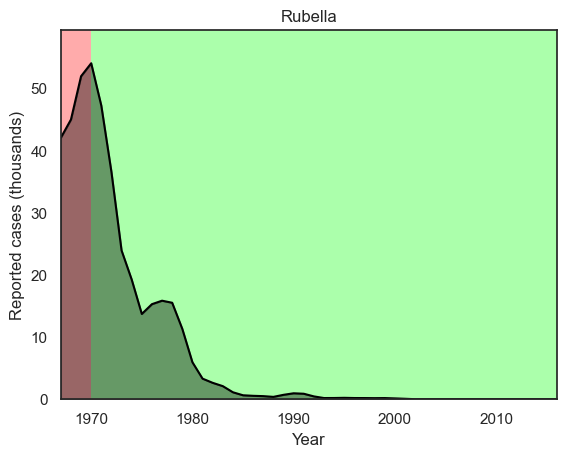

In [2]:
filenames       = ["polio.csv", "measles.csv",  "rubella.csv"]
disease_strings = ["Polio",     "Measles",      "Rubella"]
vaccine_years   = [1955,        1963,           1970]

for filename, disease_string, vaccine_year in zip(filenames, disease_strings, vaccine_years):
    data    = pd.read_csv(filename, usecols=['Fatalities', 'PeriodStartDate', 'PeriodEndDate',
       'PartOfCumulativeCountSeries','CountValue'])
    data    = data[data['Fatalities']==0]

    parsed  = data[data['PartOfCumulativeCountSeries']==0].copy()
    parsed.PeriodEndDate = data[data['PartOfCumulativeCountSeries']==0].PeriodEndDate.apply(lambda x: int(x[0:4]))
    parsed = parsed.groupby(by=['PeriodEndDate']).CountValue.sum()/1000

    parsed_cumulative = data[data['PartOfCumulativeCountSeries']==1].copy()
    parsed_cumulative.PeriodEndDate = data[data['PartOfCumulativeCountSeries']==1].PeriodEndDate.apply(lambda x: int(x[0:4]))
    parsed_cumulative = parsed_cumulative.groupby(by=['PeriodEndDate']).CountValue.max()/1000

    parsed_total = parsed.add(parsed_cumulative, fill_value=0)
    
    colormap = sns.dark_palette("#F7FFF7", as_cmap=True)
    rescale = lambda y: (y - np.min(y)*1.7) / (np.max(y)*1.7 - np.min(y)*1.7)
     
    fig = plt.figure()
    ax = fig.add_subplot()
    #ax.set_facecolor('white')
    plt.axvspan(vaccine_year, max(parsed_total.index.to_numpy()[1:-1])+0.5, color='#aaffaa', alpha=0.99, lw=0)    
    plt.axvspan(min(parsed_total.index.to_numpy()[1:-1])-0.5, vaccine_year, color='#ffaaaa', alpha=0.99, lw=0)   
    #plt.bar(parsed_total.index.to_numpy()[1:-1], moving_average(parsed_total.to_numpy(), 3), width=1, align='center', linewidth=0, color=colormap(rescale(-moving_average(parsed_total.to_numpy(), 3))))
    plt.plot(parsed_total.index.to_numpy()[1:-1], moving_average(parsed_total.to_numpy(), 3), color="#000000")

    plt.fill_between(parsed_total.index.to_numpy()[1:-1], moving_average(parsed_total.to_numpy(), 3), color="#000000", alpha=0.4)

    plt.title(disease_string)
    #for axis in ['top', 'bottom', 'left', 'right']:
    #    ax.spines[axis].set_color('black')
    plt.xlabel("Year")
    plt.ylabel("Reported cases (thousands)")
    plt.xlim([min(parsed_total.index.to_numpy()[1:-1]), max(parsed_total.index.to_numpy()[1:-1])])
    plt.ylim([0, max(moving_average(parsed_total.to_numpy(), 3))*1.1])
    plt.show()